In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/temp/V2.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V2.zip
   creating: dataset/V2/
   creating: dataset/V2/Annotations/
  inflating: dataset/V2/Annotations/scene00022.png  
  inflating: dataset/V2/Annotations/scene00023.png  
  inflating: dataset/V2/Annotations/scene00024.png  
  inflating: dataset/V2/Annotations/scene00025.png  
  inflating: dataset/V2/Annotations/scene00026.png  
  inflating: dataset/V2/Annotations/scene00027.png  
  inflating: dataset/V2/Annotations/scene00028.png  
  inflating: dataset/V2/Annotations/scene00029.png  
  inflating: dataset/V2/Annotations/scene00030.png  
  inflating: dataset/V2/Annotations/scene00031.png  
  inflating: dataset/V2/Annotations/scene00032.png  
  inflating: dataset/V2/Annotations/scene00033.png  
  inflating: dataset/V2/Annotations/scene00034.png  
  inflating: dataset/V2/Annotations/scene00035.png  
  inflating: dataset/V2/Annotations/scene00036.png  
  inflating: dataset/V2/Annotations/scene00037.png  
  inflating: dataset/V2/Annotations/scene0003

In [5]:
!unzip /content/drive/MyDrive/temp/V3.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V3.zip
   creating: dataset/V3/
   creating: dataset/V3/Annotations/
  inflating: dataset/V3/Annotations/scene00001.png  
  inflating: dataset/V3/Annotations/scene00002.png  
  inflating: dataset/V3/Annotations/scene00003.png  
  inflating: dataset/V3/Annotations/scene00004.png  
  inflating: dataset/V3/Annotations/scene00005.png  
  inflating: dataset/V3/Annotations/scene00006.png  
  inflating: dataset/V3/Annotations/scene00007.png  
  inflating: dataset/V3/Annotations/scene00008.png  
  inflating: dataset/V3/Annotations/scene00009.png  
  inflating: dataset/V3/Annotations/scene00010.png  
  inflating: dataset/V3/Annotations/scene00011.png  
  inflating: dataset/V3/Annotations/scene00012.png  
  inflating: dataset/V3/Annotations/scene00013.png  
  inflating: dataset/V3/Annotations/scene00014.png  
  inflating: dataset/V3/Annotations/scene00015.png  
  inflating: dataset/V3/Annotations/scene00016.png  
  inflating: dataset/V3/Annotations/scene0001

In [6]:
#convert all the segmented images into black and white
import cv2
import os
import numpy as np

def convert_annotations(input_folder, output_folder):
    """
    Convert pink annotations to binary (black and white) masks
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Convert to binary mask
            # Convert to grayscale first
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold to create binary image
            # Assuming pink regions are significantly different from black background
            _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Save the binary mask
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary)

# Usage
input_folder = "/content/dataset/V2/Annotations"
output_folder = "/content/dataset/V2/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [7]:
# Usage
input_folder = "/content/dataset/V3/Annotations"
output_folder = "/content/dataset/V3/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [8]:
import os
import shutil
import random

# Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/V3/Images/'
MASK_PATH = '/content/dataset/V3/AnnotationsWB'
TEST_PATH = '/content/dataset/V2/Images'

# Check the number of files in the test directory
print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

Number of files in the test directory: 128


In [9]:
# # Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/V2/AnnotationsWB'
# os.makedirs(TEST_MASKS_PATH, exist_ok=True)

In [10]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 127
Number of files in the train_image directory: 127


In [11]:
print("Number of files in the mask directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the mask directory: 128
Number of files in the train_image directory: 128


In [12]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V2/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V2/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/V2/Images/scene00113.jpeg -> /content/dataset/V2/Imagespng/scene00113.png
Converted: /content/dataset/V2/Images/scene00066.jpeg -> /content/dataset/V2/Imagespng/scene00066.png
Converted: /content/dataset/V2/Images/scene00056.jpeg -> /content/dataset/V2/Imagespng/scene00056.png
Converted: /content/dataset/V2/Images/scene00094.jpeg -> /content/dataset/V2/Imagespng/scene00094.png
Converted: /content/dataset/V2/Images/scene00072.jpeg -> /content/dataset/V2/Imagespng/scene00072.png
Converted: /content/dataset/V2/Images/scene00149.jpeg -> /content/dataset/V2/Imagespng/scene00149.png
Converted: /content/dataset/V2/Images/scene00107.jpeg -> /content/dataset/V2/Imagespng/scene00107.png
Converted: /content/dataset/V2/Images/scene00076.jpeg -> /content/dataset/V2/Imagespng/scene00076.png
Converted: /content/dataset/V2/Images/scene00140.jpeg -> /content/dataset/V2/Imagespng/scene00140.png
Converted: /content/dataset/V2/Images/scene00121.jpeg -> /content/dataset/V2/Image

In [13]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V3/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V3/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/V3/Images/scene00113.jpeg -> /content/dataset/V3/Imagespng/scene00113.png
Converted: /content/dataset/V3/Images/scene00066.jpeg -> /content/dataset/V3/Imagespng/scene00066.png
Converted: /content/dataset/V3/Images/scene00056.jpeg -> /content/dataset/V3/Imagespng/scene00056.png
Converted: /content/dataset/V3/Images/scene00094.jpeg -> /content/dataset/V3/Imagespng/scene00094.png
Converted: /content/dataset/V3/Images/scene00072.jpeg -> /content/dataset/V3/Imagespng/scene00072.png
Converted: /content/dataset/V3/Images/scene00007.jpeg -> /content/dataset/V3/Imagespng/scene00007.png
Converted: /content/dataset/V3/Images/scene00107.jpeg -> /content/dataset/V3/Imagespng/scene00107.png
Converted: /content/dataset/V3/Images/scene00076.jpeg -> /content/dataset/V3/Imagespng/scene00076.png
Converted: /content/dataset/V3/Images/scene00121.jpeg -> /content/dataset/V3/Imagespng/scene00121.png
Converted: /content/dataset/V3/Images/scene00017.jpeg -> /content/dataset/V3/Image

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (128,128))#change size of input image here...

    img = img / 255.0

    return img

INterRouted Method:

In [15]:
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size, image_size=(128,128)):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.image_size = image_size

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def __getitem__(self, index):
        batch_files = self.file_list[index * self.batch_size:(index + 1) * self.batch_size]

        images = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))
        masks = np.zeros((len(batch_files), self.image_size[0], self.image_size[1], 1))

        for i, filename in enumerate(batch_files):
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            # Load and preprocess image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0
            img = np.expand_dims(img, axis=-1)

            # Load and preprocess mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)

            images[i] = img
            masks[i] = mask

        return images, masks

**Light Weight UNet Model**

In [16]:
!pip install keras_unet_collection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.2 MB/s eta 0:00:00


In [17]:
from keras_unet_collection import models

In [20]:
from keras_unet_collection import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# Define paths
IMAGE_PATH = "/content/dataset/V2/Imagespng"
MASK_PATH = "/content/dataset/V2/Annotations"

# Modified model definition for single-channel input
def build_lightweight_unet():
    model = models.unet_2d(
        input_size=(128, 128, 1),
        filter_num=[2,4,8,16,32],
        n_labels=1,
        stack_num_down=2,
        stack_num_up=1,
        activation='ReLU',
        output_activation='Sigmoid',
        batch_norm=True,
        pool='max',
        unpool='nearest',
        name='lightweight_unet'
    )
    return model

model = build_lightweight_unet()

BiFocal Loss

In [21]:
import tensorflow as tf

def binary_focal_loss(gamma=2.0, alpha=0.25):
    """
    Binary focal loss with additional parameters for fine-tuning
    gamma: focusing parameter for hard examples
    alpha: class weight parameter
    """
    def focal_loss(y_true, y_pred):
        # Cast inputs to float32 for consistency with wavelet processing
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

        # Calculate focal loss
        loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred) - \
               (1 - y_true) * (1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
        return tf.reduce_mean(loss)
    return focal_loss

# Model compilation with focal loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=binary_focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy',
             tf.keras.metrics.BinaryIoU(threshold=0.5),
             tf.keras.metrics.Recall(),
             tf.keras.metrics.Precision()]
)

In [22]:
# Print the model summary to confirm the architecture
model.summary()
batch_size=4

Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │             18 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,025 (121.19 KB)

 Non-trainable params: 368 (1.44 KB)

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

IMAGE_PATH="/content/dataset/V3/Imagespng"
MASK_PATH="/content/dataset/V3/AnnotationsWB"

# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

# Training setup remains the same, just use the new DataGenerator
train_data_gen = DataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = DataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

In [25]:
# Extract a single batch from the train_data_gen
sample_images, sample_masks = train_data_gen[0]  # First batch

# Get the shape of a single image and mask from the batch
image_shape = sample_images[0].shape  # Shape of one image in the batch
mask_shape = sample_masks[0].shape   # Shape of one mask in the batch

print(f"Image shape: {image_shape}")
print(f"Mask shape: {mask_shape}")

Image shape: (128, 128, 1)
Mask shape: (128, 128, 1)


In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

model.save("LightWeightUNetLiver.h5")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 650ms/step - accuracy: 0.5883 - binary_io_u: 0.3617 - loss: 0.1487 - precision: 0.2762 - recall: 0.6434 - val_accuracy: 0.8093 - val_binary_io_u: 0.4065 - val_loss: 0.1094 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9081 - binary_io_u: 0.7536 - loss: 0.1042 - precision: 0.7974 - recall: 0.7152 - val_accuracy: 0.8114 - val_binary_io_u: 0.4075 - val_loss: 0.1052 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9594 - binary_io_u: 0.8813 - loss: 0.0947 - precision: 0.9570 - recall: 0.8291 - val_accuracy: 0.8122 - val_binary_io_u: 0.4079 - val_loss: 0.0997 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9728 - binary_io_u: 0.9217 - loss: 0.0867 - precision: 0.9752 - recall: 0.885

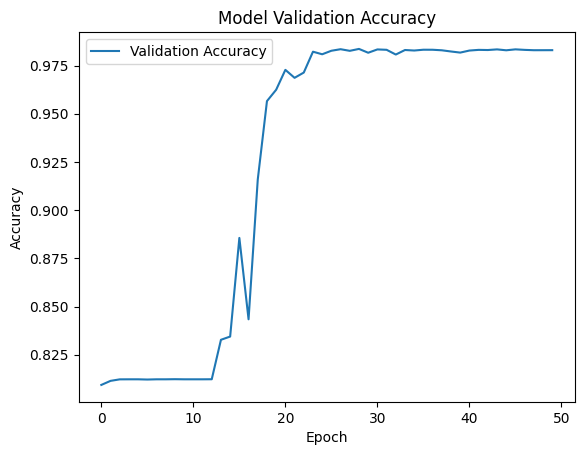

In [27]:
# Train the model for
# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


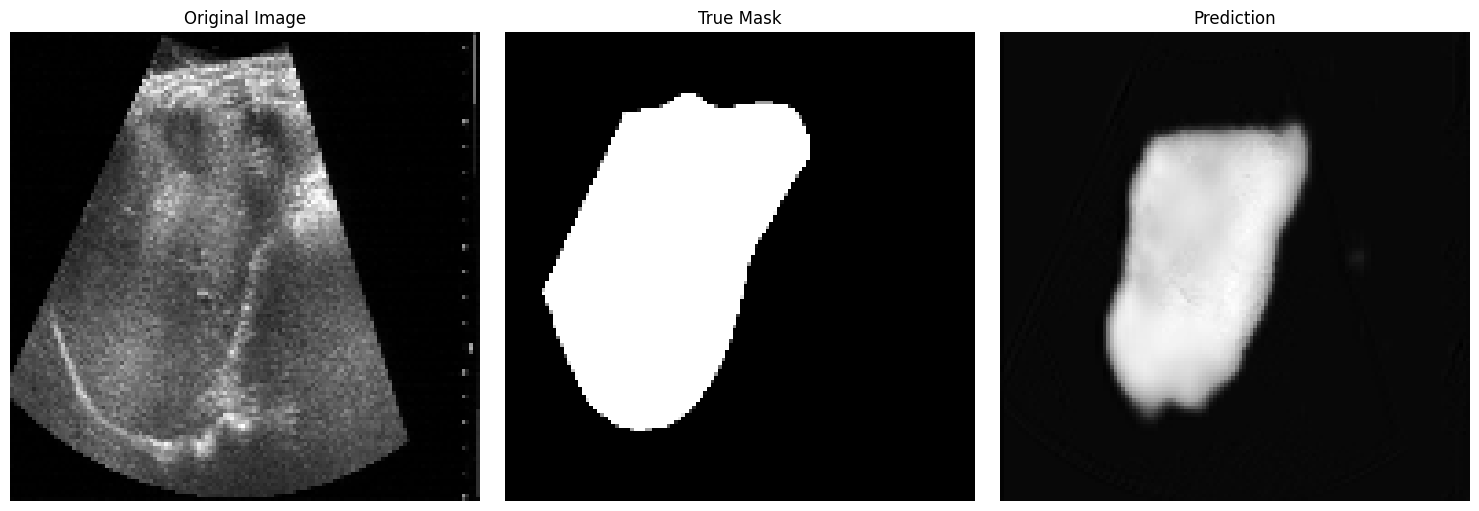

In [28]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def visualize_results(image_path, mask_path, model, image_size=(128, 128)):
    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, image_size)
    image_normalized = image.astype('float32') / 255.0

    # Load and preprocess mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, image_size)
    mask_normalized = mask.astype('float32') / 255.0

    # Make prediction
    input_image = np.expand_dims(image_normalized, axis=[0, -1])
    prediction = model.predict(input_image)
    prediction = prediction[0, :, :, 0]

    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot true mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('True Mask')
    axes[1].axis('off')

    # Plot prediction
    axes[2].imshow(prediction, cmap='gray')
    axes[2].set_title('Prediction')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

# Usage example:
sample_image_path = "/content/dataset/V2/Imagespng/scene00022.png"
sample_mask_path = "/content/dataset/V2/AnnotationsWB/scene00022.png"
visualize_results(sample_image_path, sample_mask_path, model)

Original image shape: (480, 712)
Original image range: [0, 147]
Input shape to model: (1, 128, 128, 1)
Input range to model: [0.000, 0.553]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Raw prediction shape: (1, 128, 128, 1)
Raw prediction range: [0.103, 0.889]
Raw prediction unique values: 8981 values


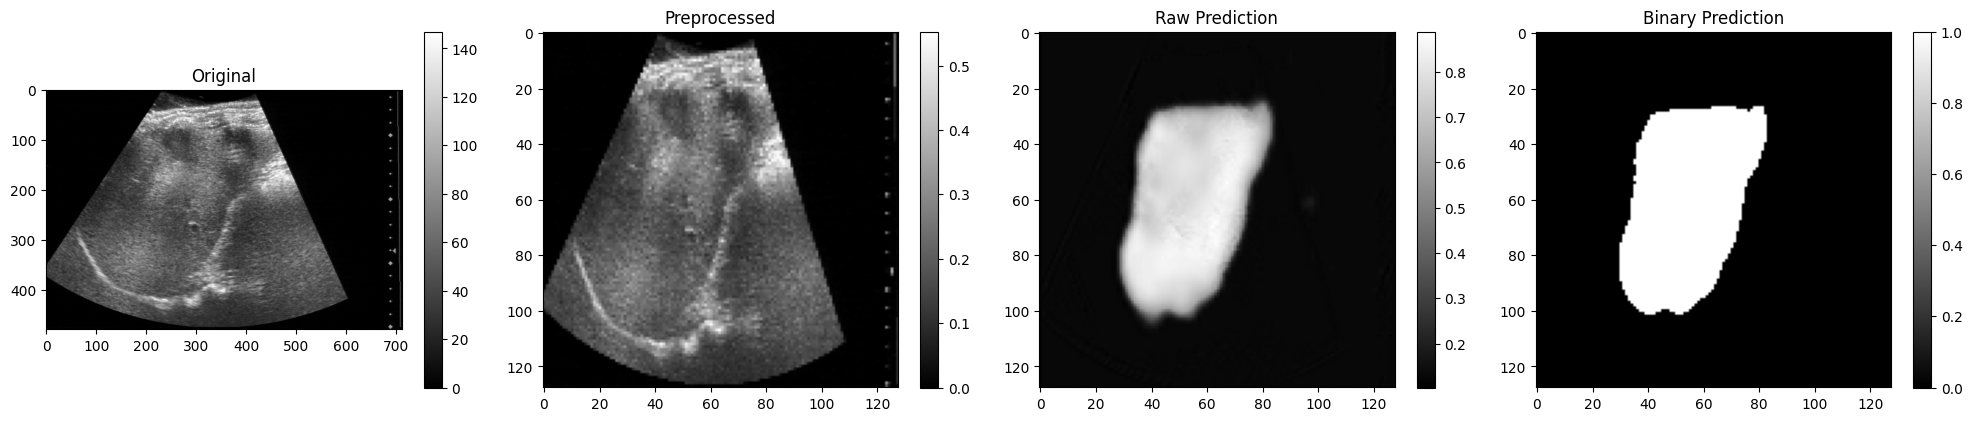

In [29]:
def debug_prediction(image_path, mask_path, model):
    # 1. Load and check image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print(f"Original image shape: {image.shape}")
    print(f"Original image range: [{image.min()}, {image.max()}]")

    # 2. Preprocess and check
    input_image = cv2.resize(image, (128, 128))
    input_image = input_image.astype('float32') / 255.0
    input_image = np.expand_dims(input_image, axis=[0, -1])
    print(f"Input shape to model: {input_image.shape}")
    print(f"Input range to model: [{input_image.min():.3f}, {input_image.max():.3f}]")

    # 3. Get raw predictions
    raw_pred = model.predict(input_image)
    print(f"Raw prediction shape: {raw_pred.shape}")
    print(f"Raw prediction range: [{raw_pred.min():.3f}, {raw_pred.max():.3f}]")
    print(f"Raw prediction unique values: {np.unique(raw_pred).shape[0]} values")

    # 4. Visualize with detailed information
    plt.figure(figsize=(20, 4))

    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.colorbar()

    plt.subplot(142)
    plt.imshow(input_image[0,:,:,0], cmap='gray')
    plt.title('Preprocessed')
    plt.colorbar()

    plt.subplot(143)
    plt.imshow(raw_pred[0,:,:,0], cmap='gray')
    plt.title('Raw Prediction')
    plt.colorbar()

    plt.subplot(144)
    binary_pred = (raw_pred[0,:,:,0] > 0.5).astype(np.uint8)
    plt.imshow(binary_pred, cmap='gray')
    plt.title('Binary Prediction')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    return raw_pred

# Test with a sample image
sample_pred = debug_prediction(sample_image_path, sample_mask_path, model)

1. Original image stats:
   Shape: (480, 712)
   Range: [0, 147]

2. Input tensor stats:
   Shape: (1, 128, 128, 1)
   Range: [0.000, 0.553]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

3. Raw prediction stats:
   Shape: (1, 128, 128, 1)
   Range: [0.103, 0.889]
   Mean: 0.245

4. Model architecture:


Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │             18 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 93,445 (365.02 KB)

 Trainable params: 31,025 (121.19 KB)

 Non-trainable params: 368 (1.44 KB)

 Optimizer params: 62,052 (242.39 KB)

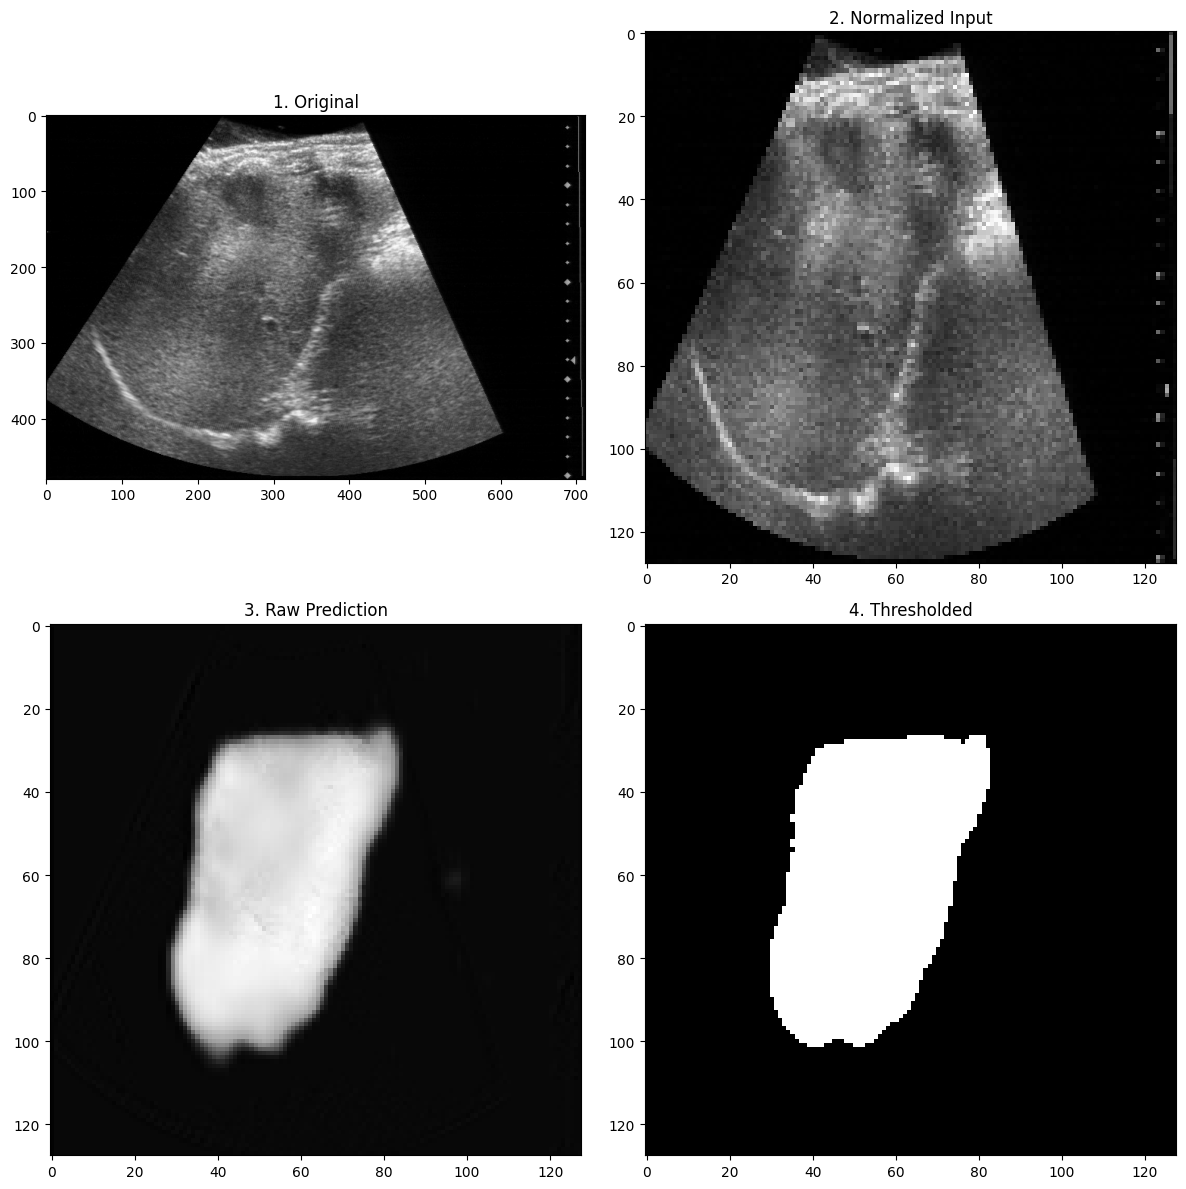

In [30]:
def detailed_debug(image_path, mask_path, model):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to load image from {image_path}")
    print(f"1. Original image stats:")
    print(f"   Shape: {image.shape}")
    print(f"   Range: [{image.min()}, {image.max()}]")

    # Preprocess
    resized = cv2.resize(image, (128, 128))
    normalized = resized.astype('float32') / 255.0
    input_tensor = np.expand_dims(normalized, axis=[0, -1])
    print(f"\n2. Input tensor stats:")
    print(f"   Shape: {input_tensor.shape}")
    print(f"   Range: [{input_tensor.min():.3f}, {input_tensor.max():.3f}]")

    # Model prediction
    pred = model.predict(input_tensor)
    print(f"\n3. Raw prediction stats:")
    print(f"   Shape: {pred.shape}")
    print(f"   Range: [{pred.min():.3f}, {pred.max():.3f}]")
    print(f"   Mean: {pred.mean():.3f}")

    # Model summary
    print("\n4. Model architecture:")
    model.summary()

    # Visualize
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes[0,0].imshow(image, cmap='gray')
    axes[0,0].set_title('1. Original')

    axes[0,1].imshow(normalized, cmap='gray')
    axes[0,1].set_title('2. Normalized Input')

    axes[1,0].imshow(pred[0,:,:,0], cmap='gray')
    axes[1,0].set_title('3. Raw Prediction')

    binary = (pred[0,:,:,0] > 0.5).astype(np.uint8)
    axes[1,1].imshow(binary, cmap='gray')
    axes[1,1].set_title('4. Thresholded')

    plt.tight_layout()
    plt.show()

    return pred, binary

# Run debug
test_pred, test_binary = detailed_debug(sample_image_path, sample_mask_path, model)

Original image range: [0, 159]
Preprocessed image range: [0.0, 0.6235294342041016]
Ground truth mask range: [0.0, 1.0]
Input batch shape: (1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Raw prediction range: [0.09653235971927643, 0.920856237411499]
Binary prediction unique values: [0 1]


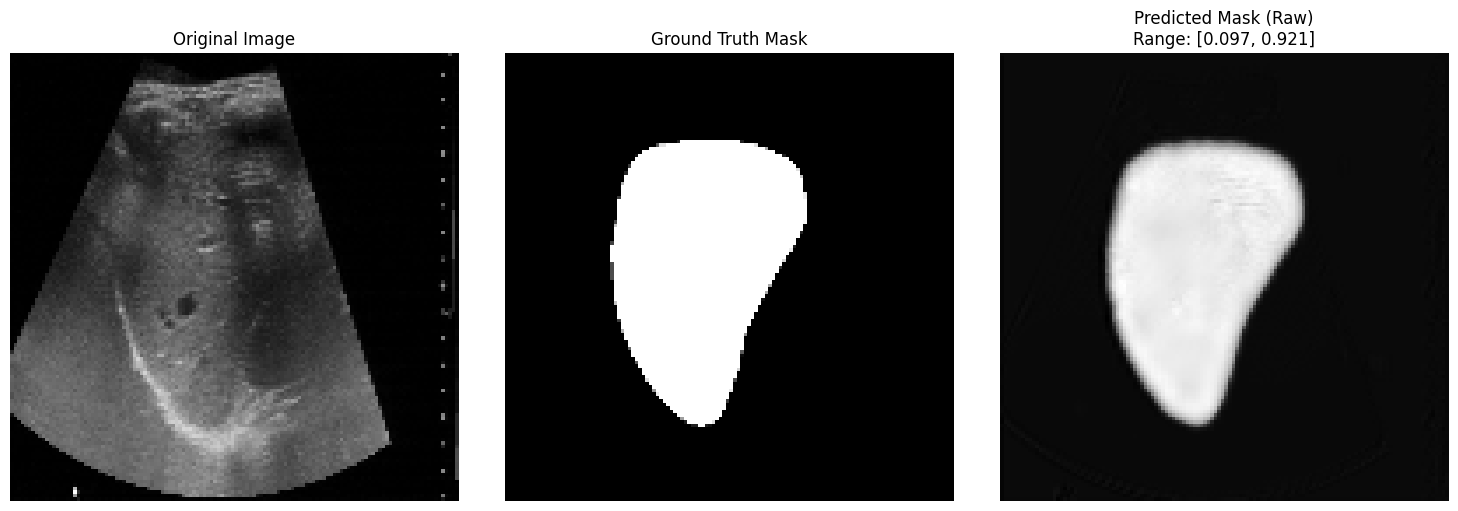

Accuracy: 0.9938
F1 Score: 0.9839


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise ValueError(f"Could not load image from {image_path}")
    original_image = cv2.resize(original_image, target_size)

    # Debug print
    print(f"Original image range: [{original_image.min()}, {original_image.max()}]")

    preprocessed_image = original_image.astype('float32') / 255.0
    print(f"Preprocessed image range: [{preprocessed_image.min()}, {preprocessed_image.max()}]")

    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)
    return original_image, preprocessed_image

def load_ground_truth_mask(mask_path, target_size=(128, 128)):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Could not load mask from {mask_path}")
    mask = cv2.resize(mask, target_size)
    mask = mask.astype('float32') / 255.0
    print(f"Ground truth mask range: [{mask.min()}, {mask.max()}]")
    return mask

# Load and predict
image_path = "/content/dataset/V3/Imagespng/scene00003.png"
mask_path = "/content/dataset/V3/AnnotationsWB/scene00003.png"

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)
print(f"Input batch shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)
print(f"Raw prediction range: [{predicted_mask.min()}, {predicted_mask.max()}]")

# Try different threshold values if needed
threshold = 0.5
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)
print(f"Binary prediction unique values: {np.unique(predicted_mask_binary)}")

# Visualization with enhanced contrast
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
plt.title(f'Predicted Mask (Raw)\nRange: [{predicted_mask.min():.3f}, {predicted_mask.max():.3f}]')
plt.axis('off')

plt.tight_layout()
plt.show()

# Metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = (ground_truth_mask > 0.5).astype(np.uint8).flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Metrics

Processing image 1/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


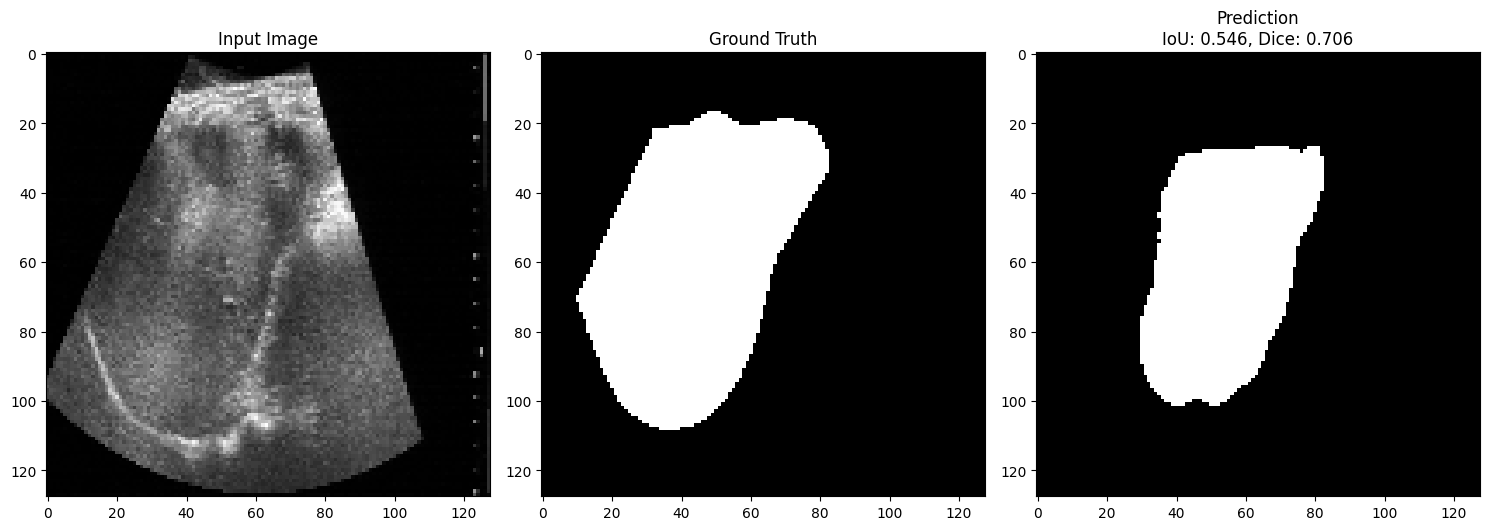

Processing image 2/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 3/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processing image 4/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processing image 5/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 6/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


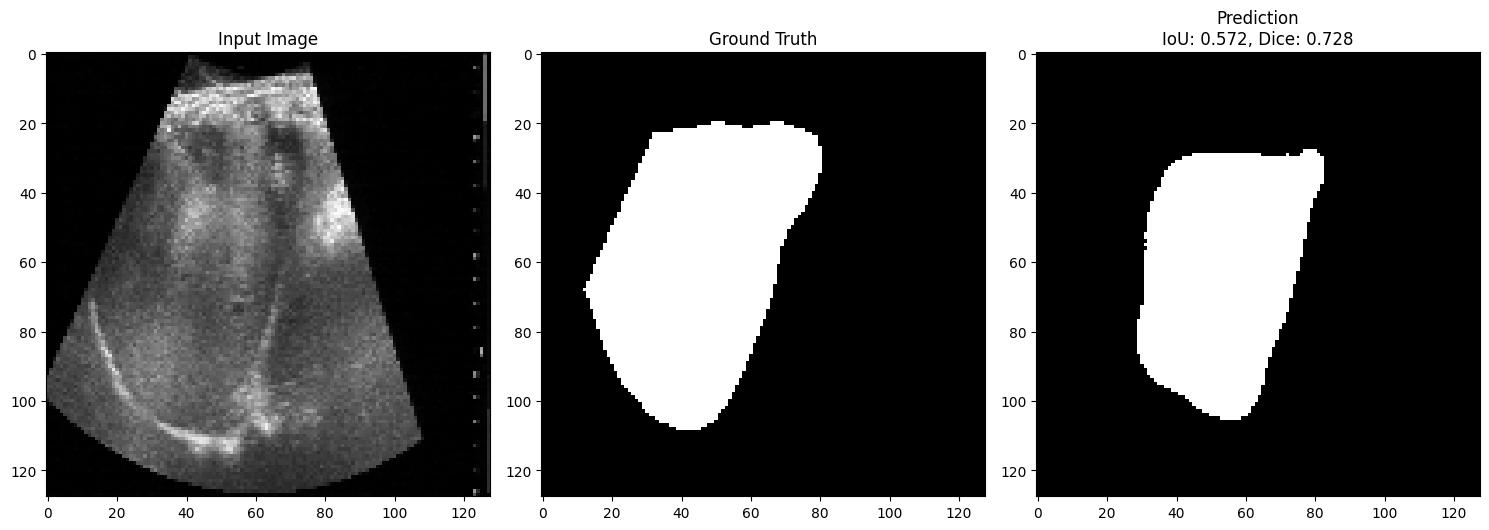

Processing image 7/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing image 8/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 9/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing image 10/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 11/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


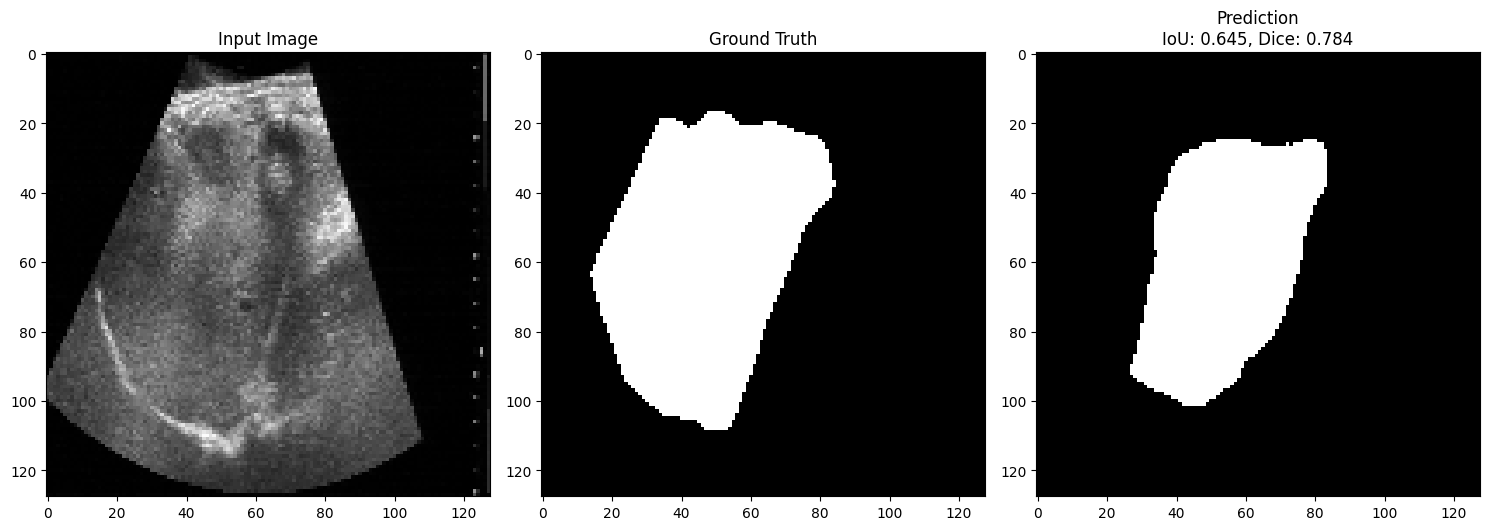

Processing image 12/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing image 13/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 14/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 15/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 16/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


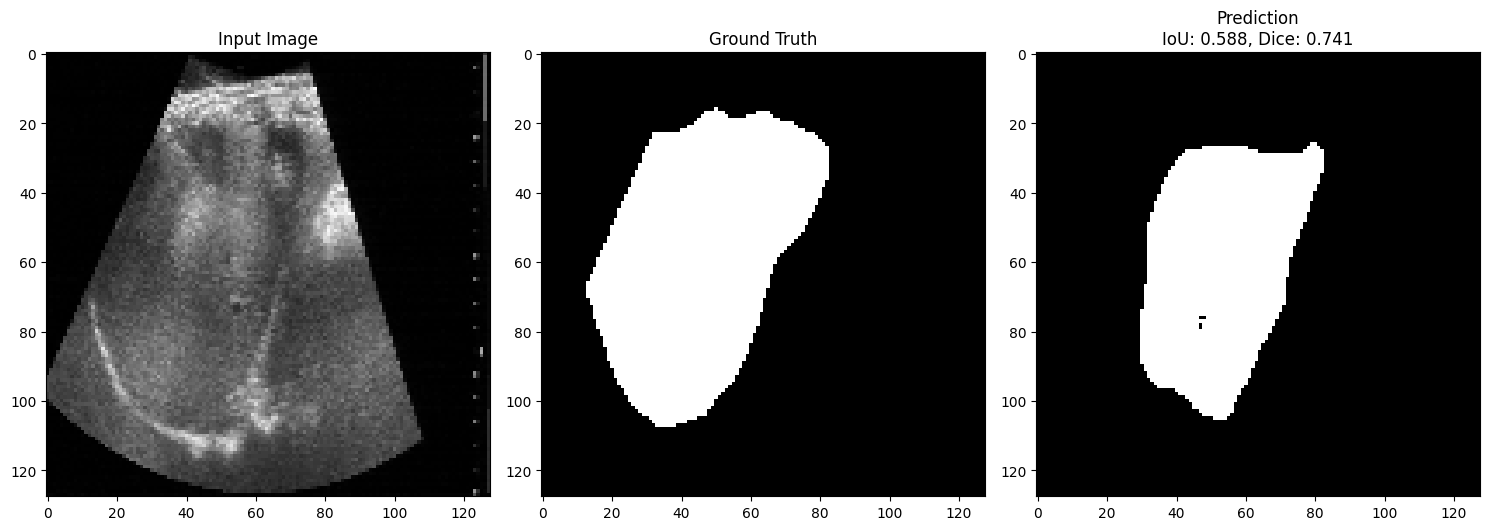

Processing image 17/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 18/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 19/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 20/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 21/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


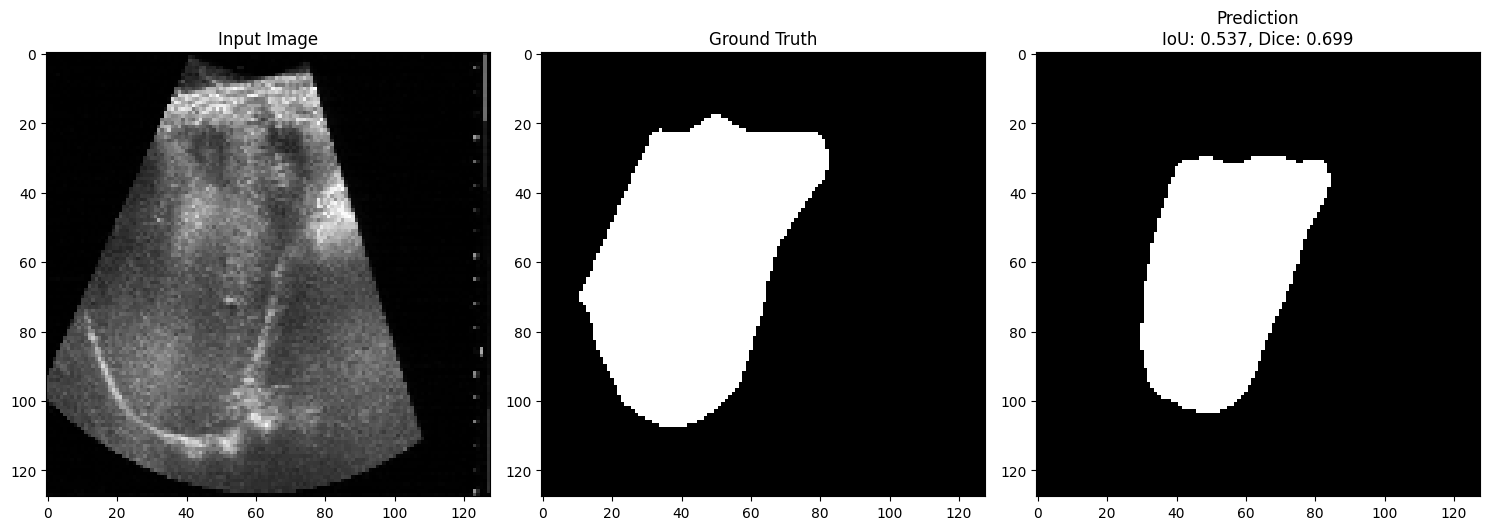

Processing image 22/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 23/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 24/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 25/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Processing image 26/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


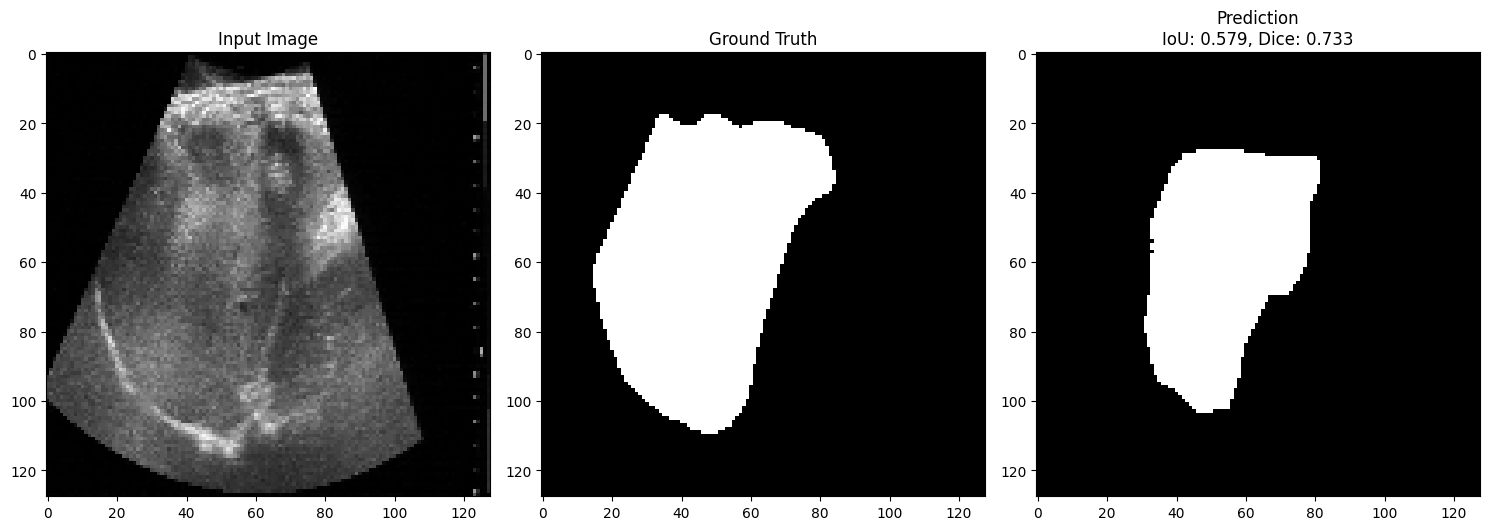

Processing image 27/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 28/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 29/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 30/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing image 31/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


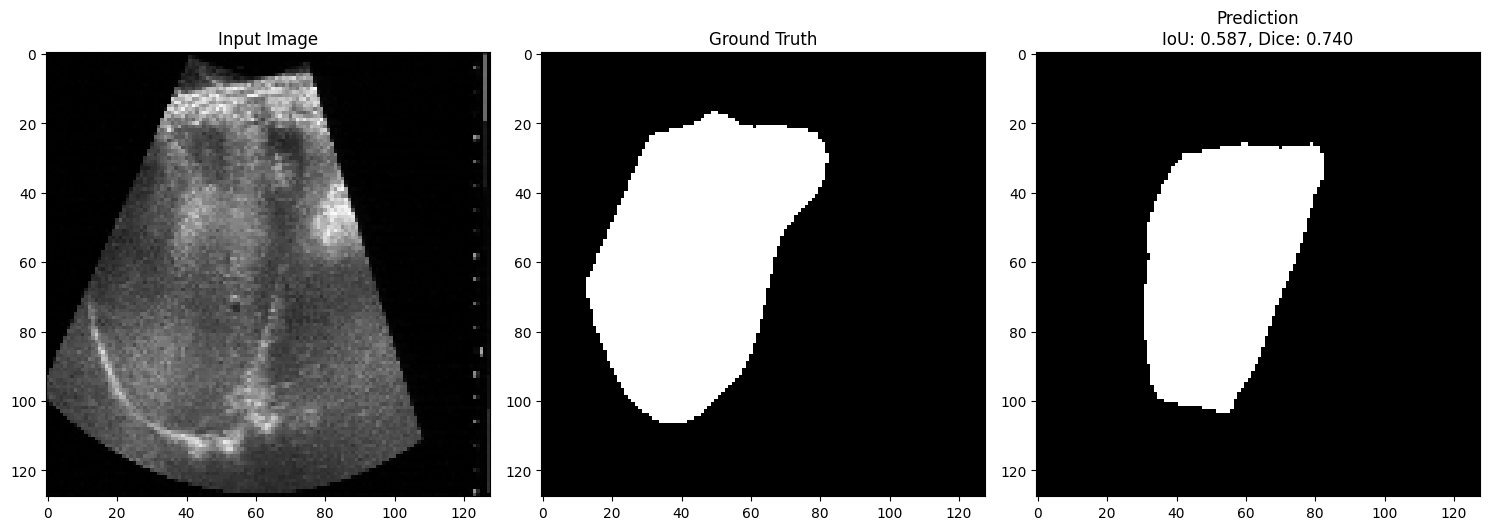

Processing image 32/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 33/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 34/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing image 35/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 36/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


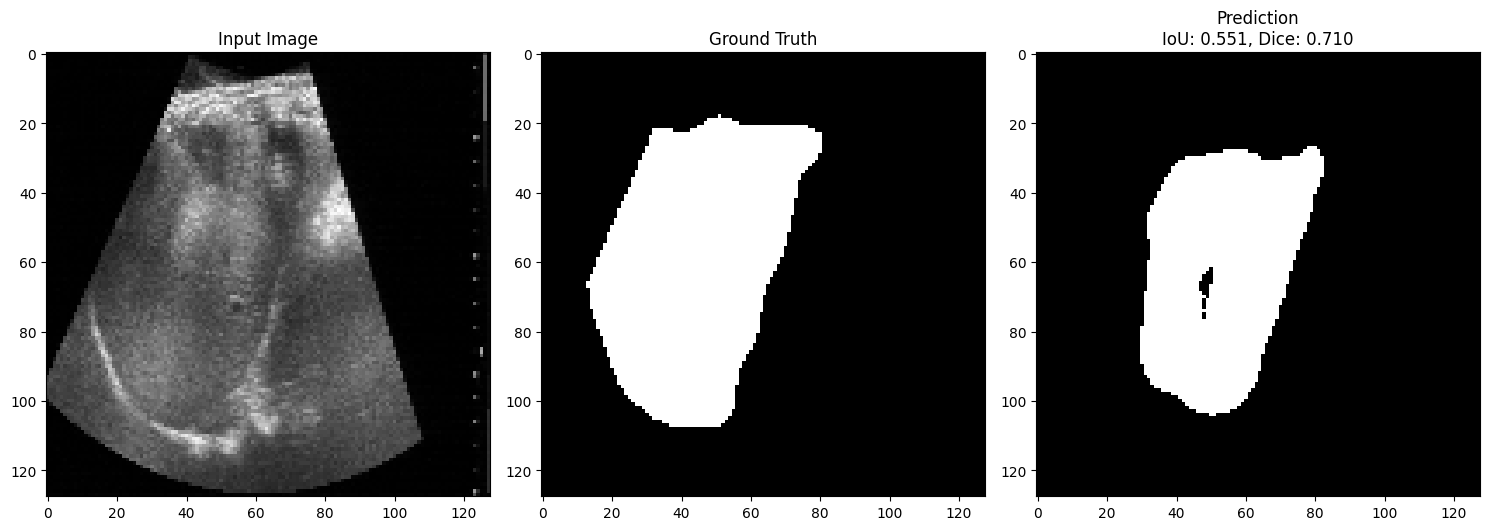

Processing image 37/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 38/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing image 39/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing image 40/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 41/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


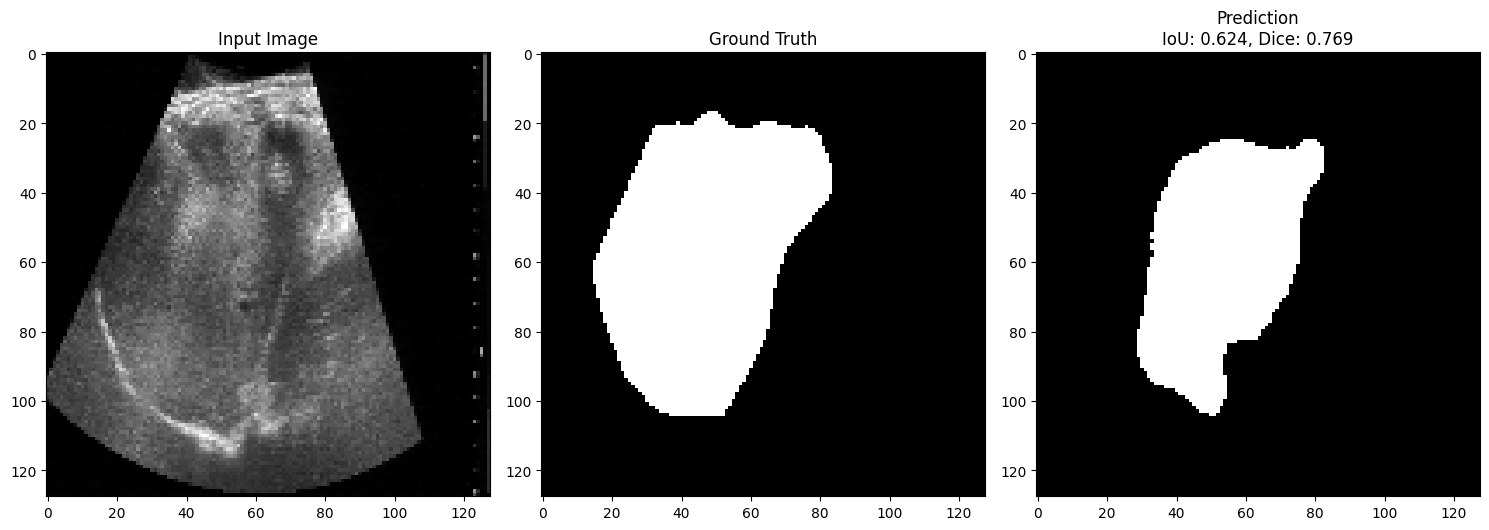

Processing image 42/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 43/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing image 44/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 45/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 46/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


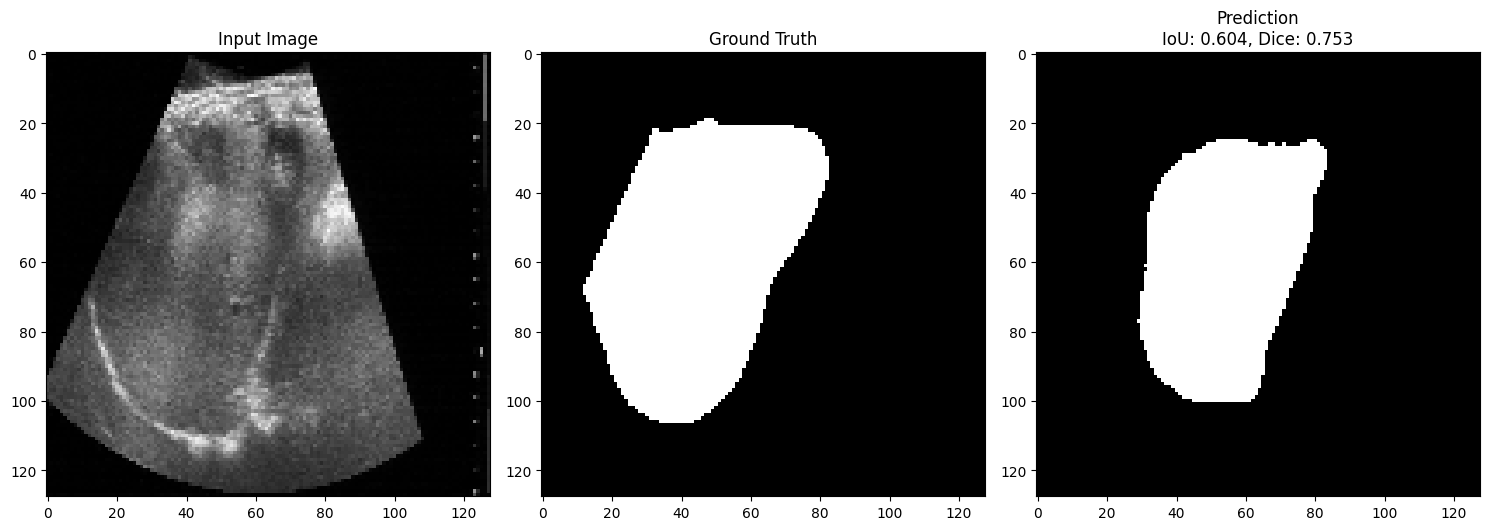

Processing image 47/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 48/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 49/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 50/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 51/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


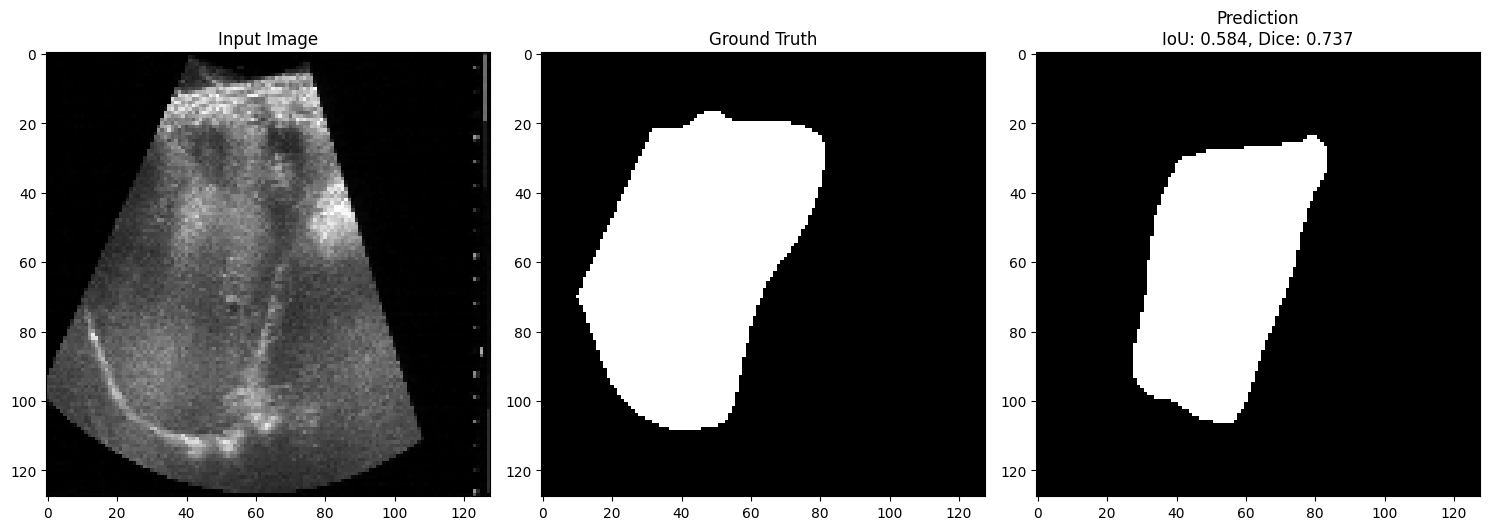

Processing image 52/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 53/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processing image 54/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 55/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 56/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


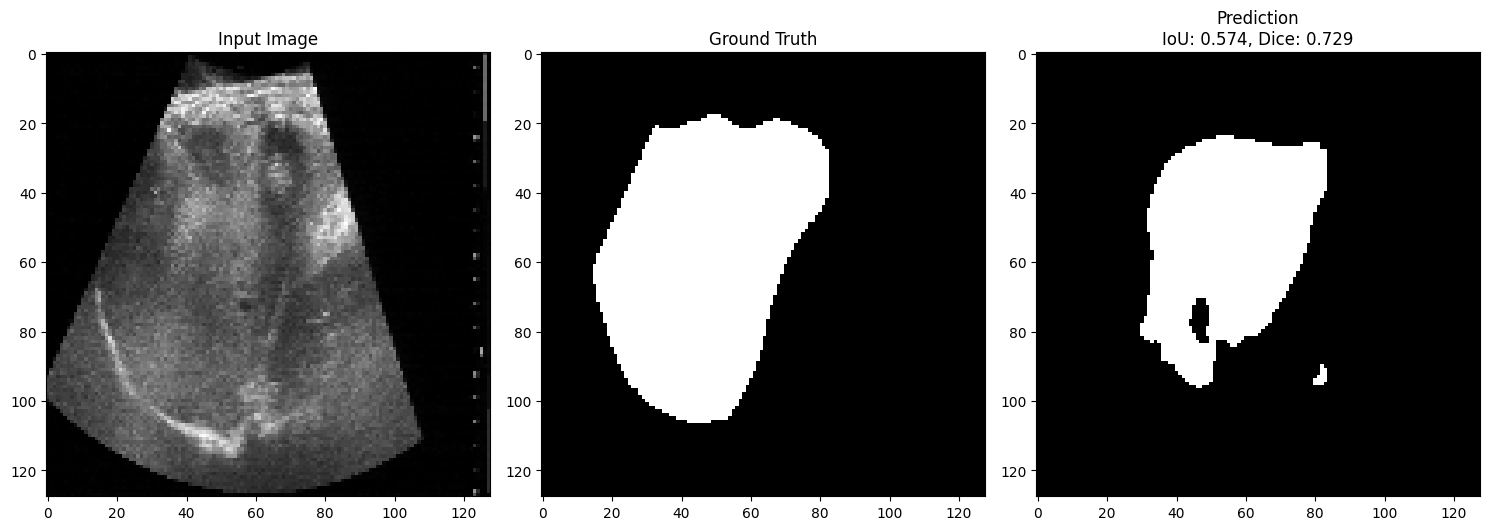

Processing image 57/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 58/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 59/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 60/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 61/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


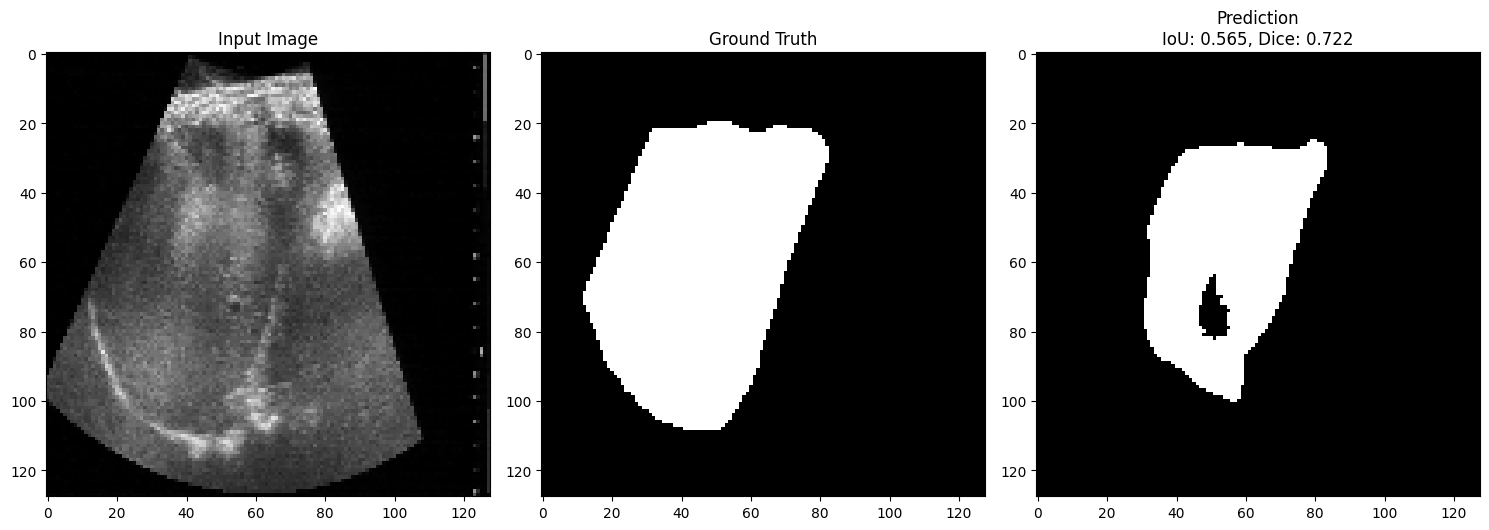

Processing image 62/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 63/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing image 64/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 65/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 66/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


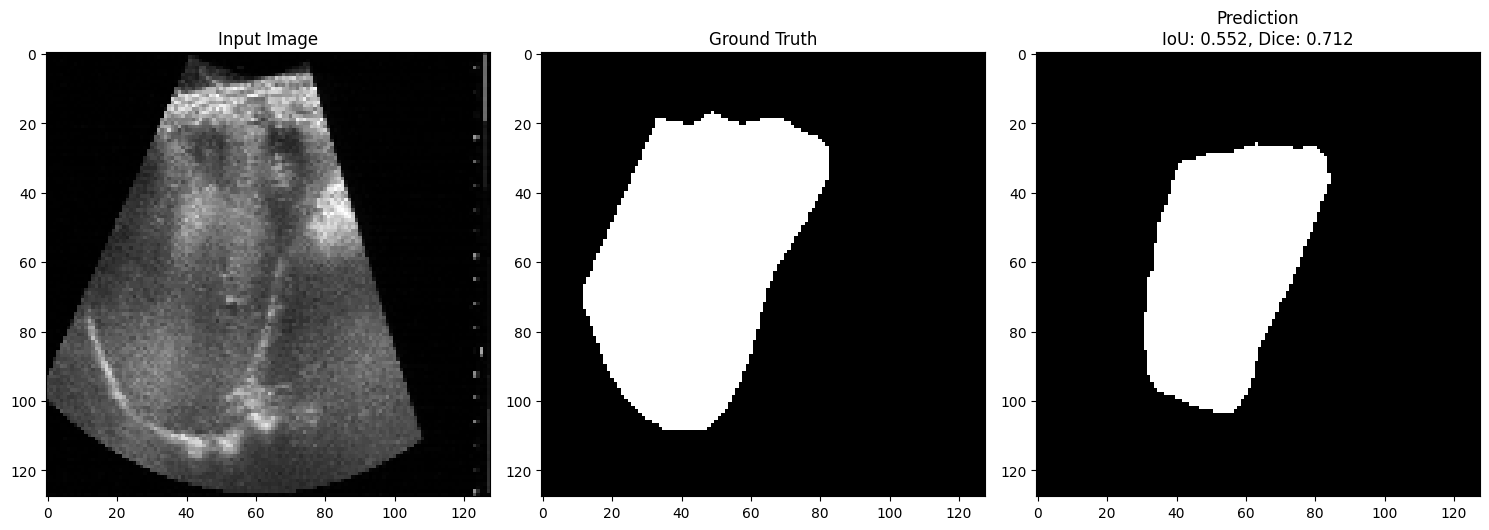

Processing image 67/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 68/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 69/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 70/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing image 71/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


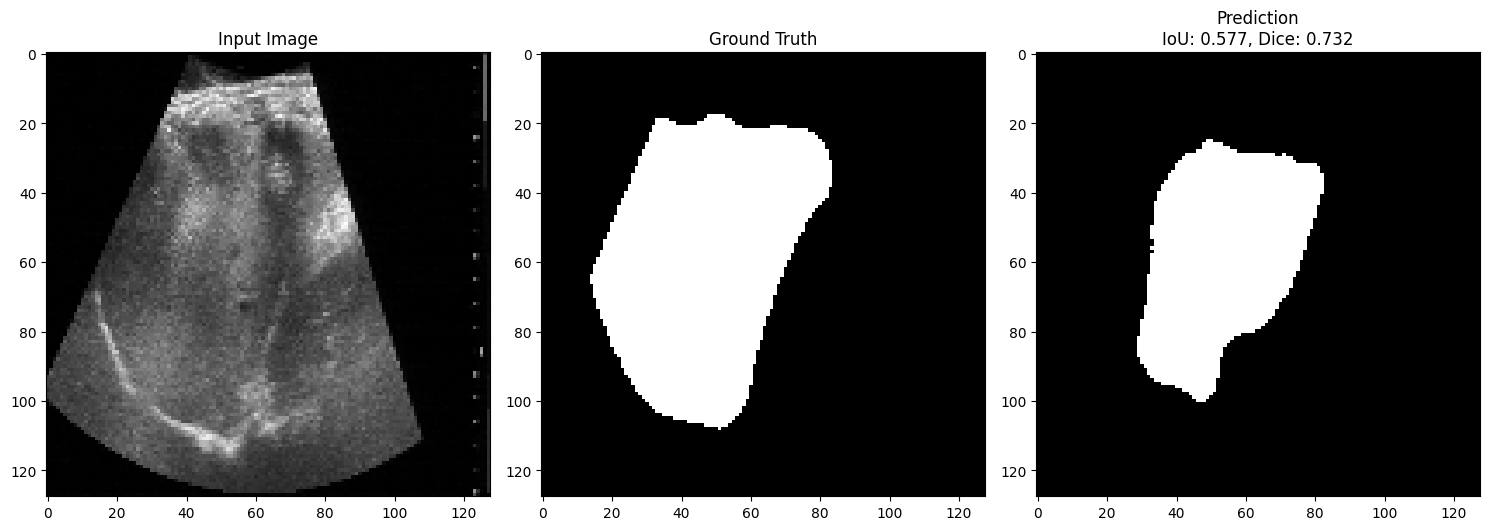

Processing image 72/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 73/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 74/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Processing image 75/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 76/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


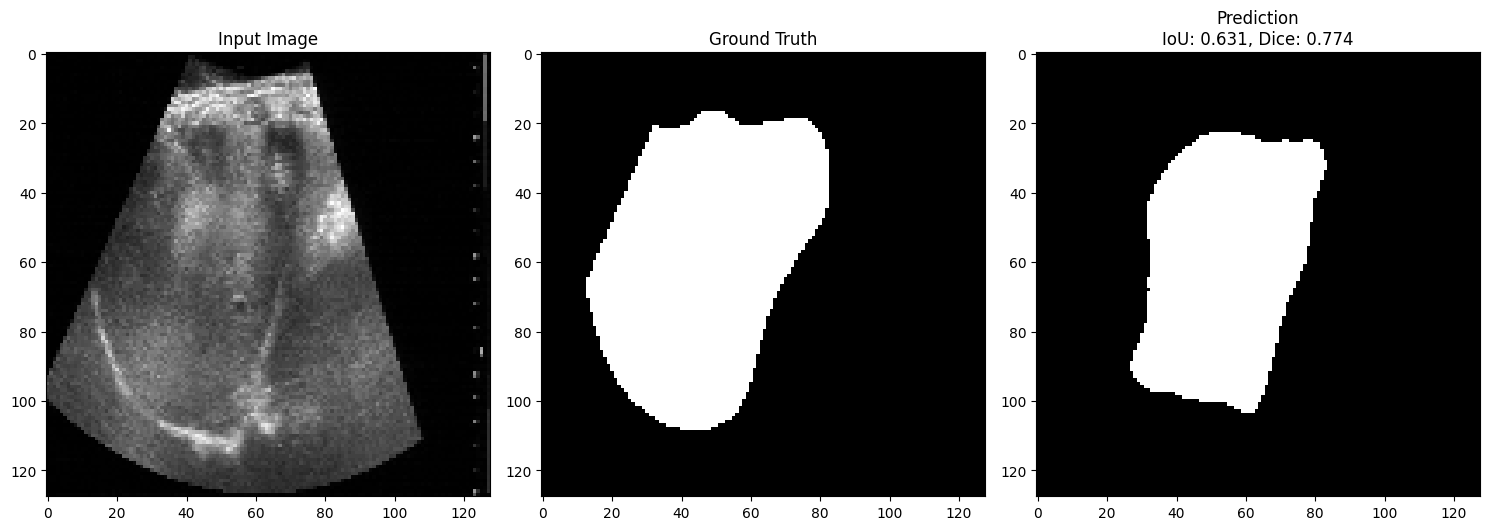

Processing image 77/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Processing image 78/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 79/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing image 80/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 81/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


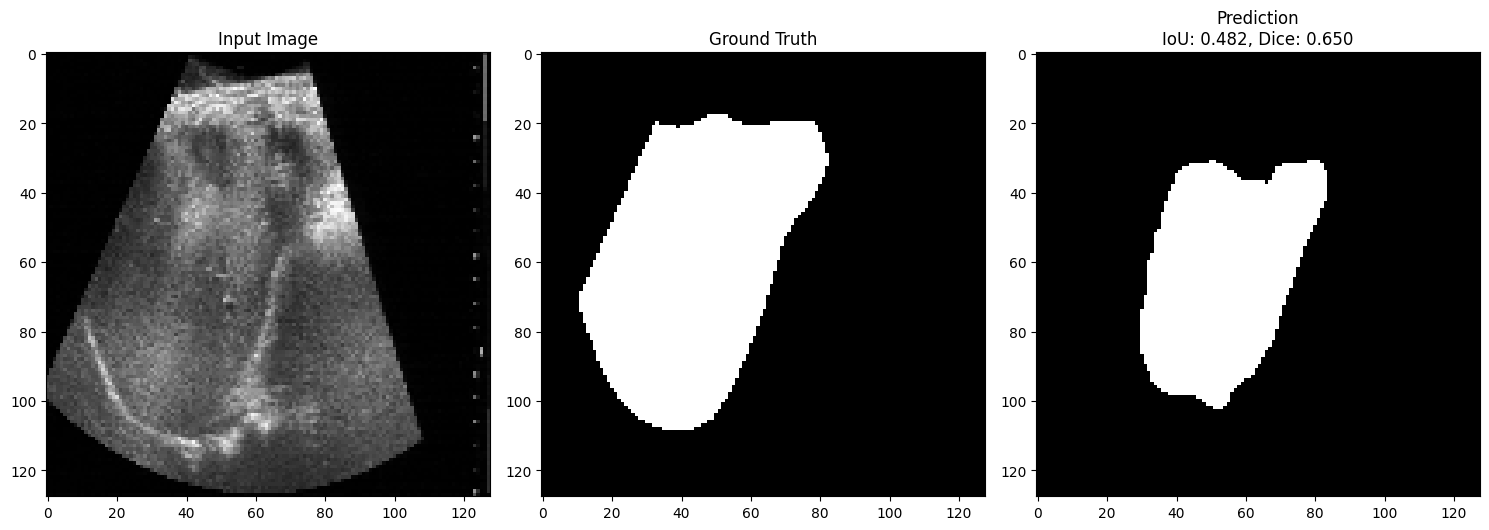

Processing image 82/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 83/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 84/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing image 85/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 86/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


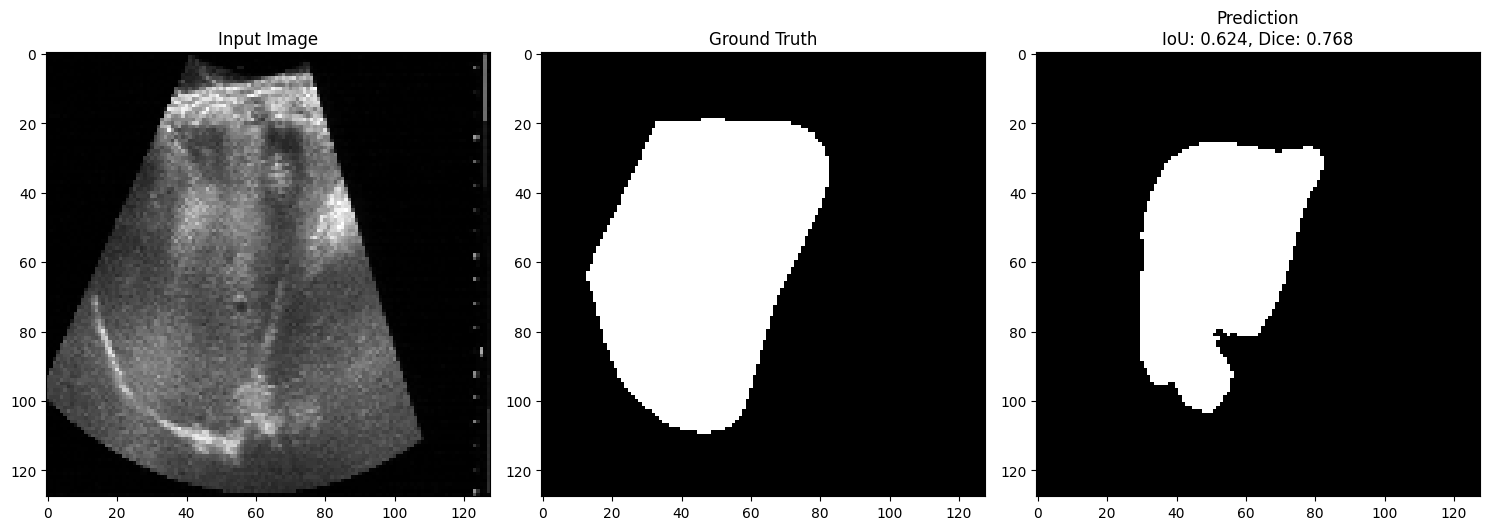

Processing image 87/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 88/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 89/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Processing image 90/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processing image 91/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


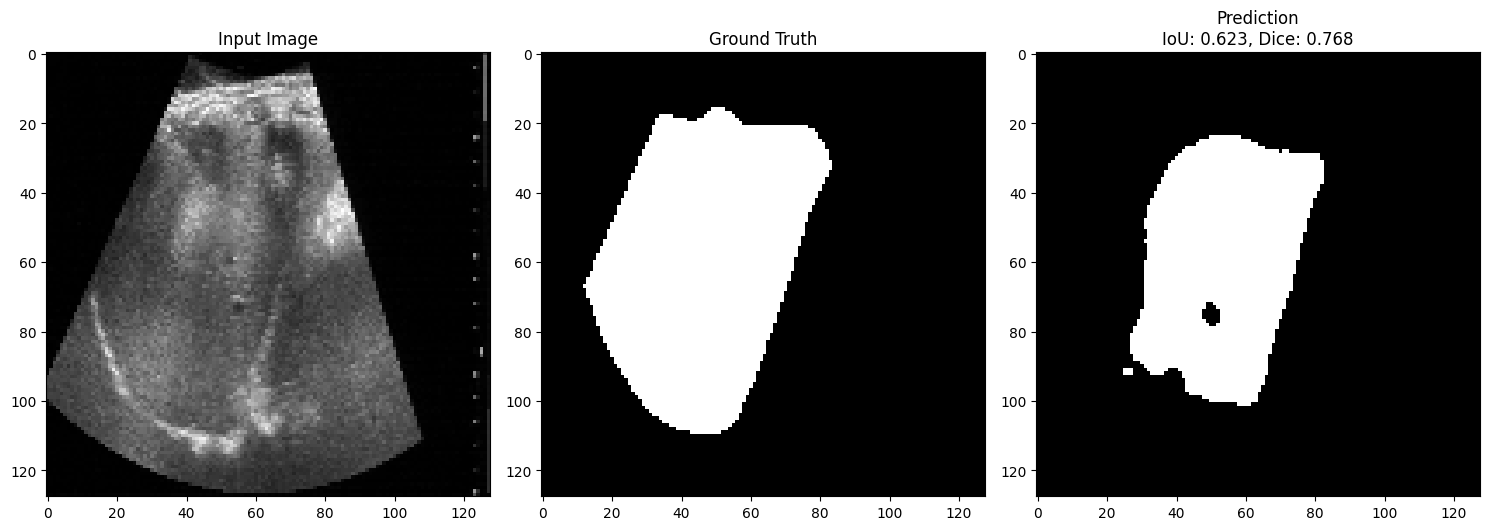

Processing image 92/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Processing image 93/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Processing image 94/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processing image 95/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Processing image 96/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


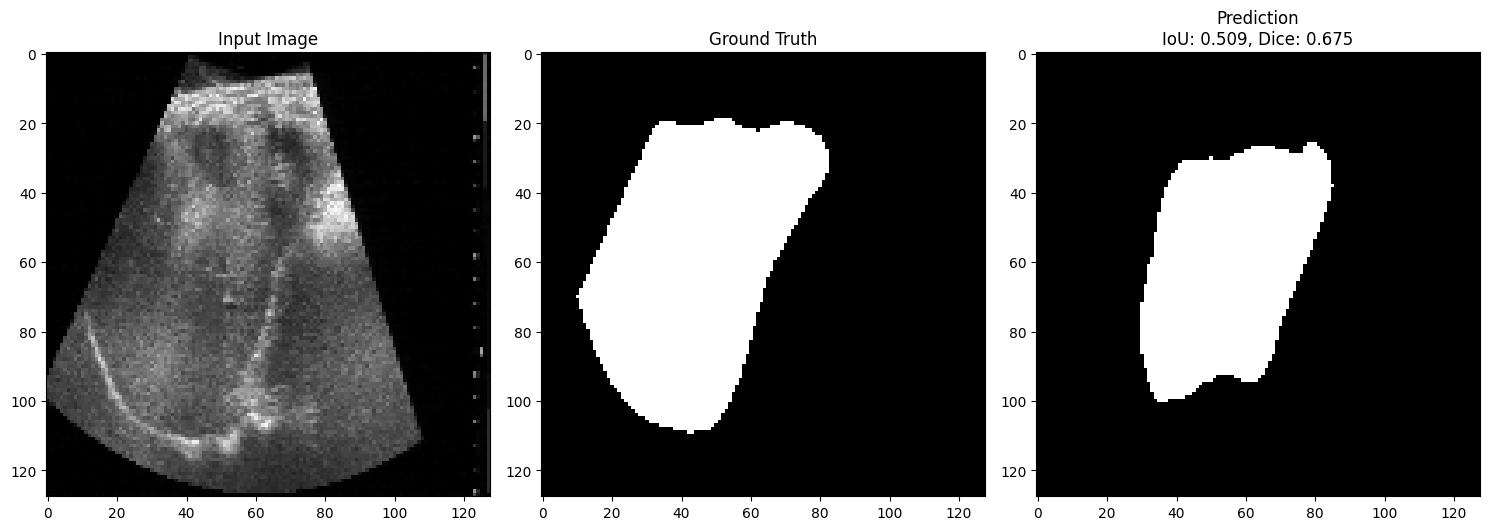

Processing image 97/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 98/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 99/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Processing image 100/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 101/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


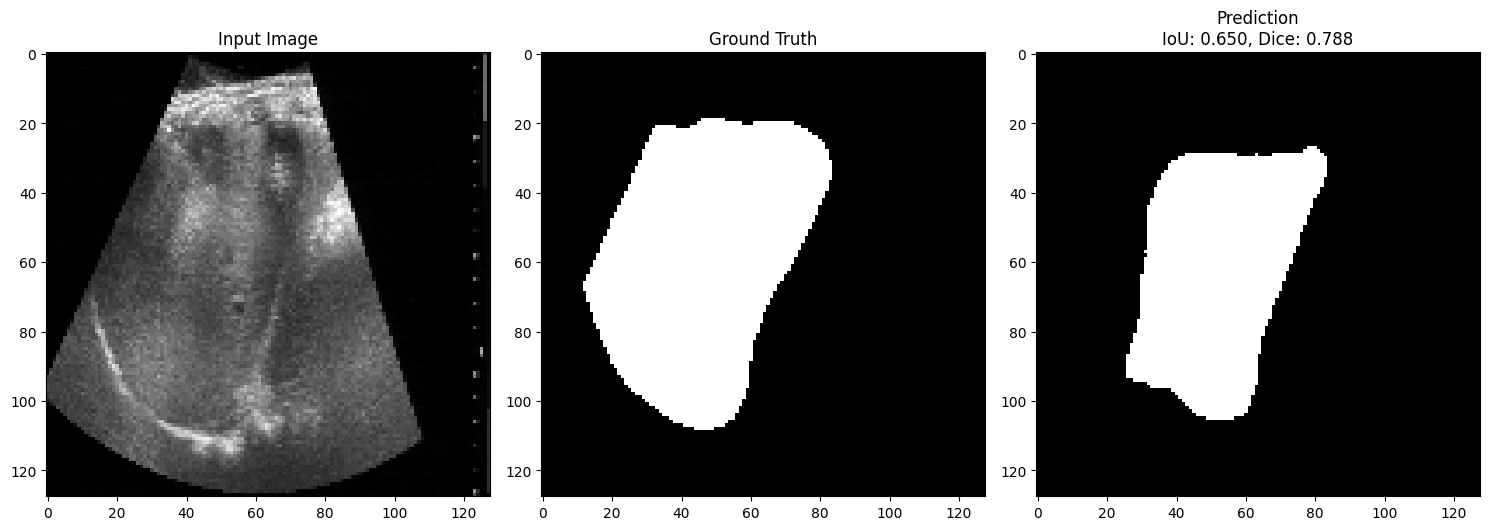

Processing image 102/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 103/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 104/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 105/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 106/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


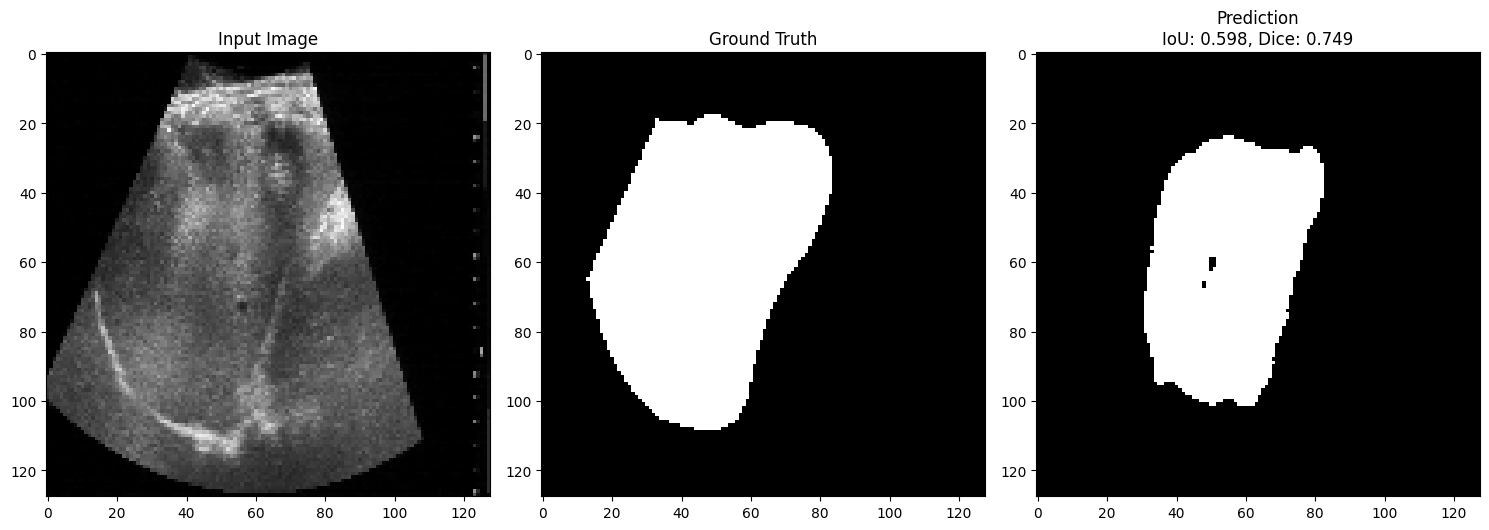

Processing image 107/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 108/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 109/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 110/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 111/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


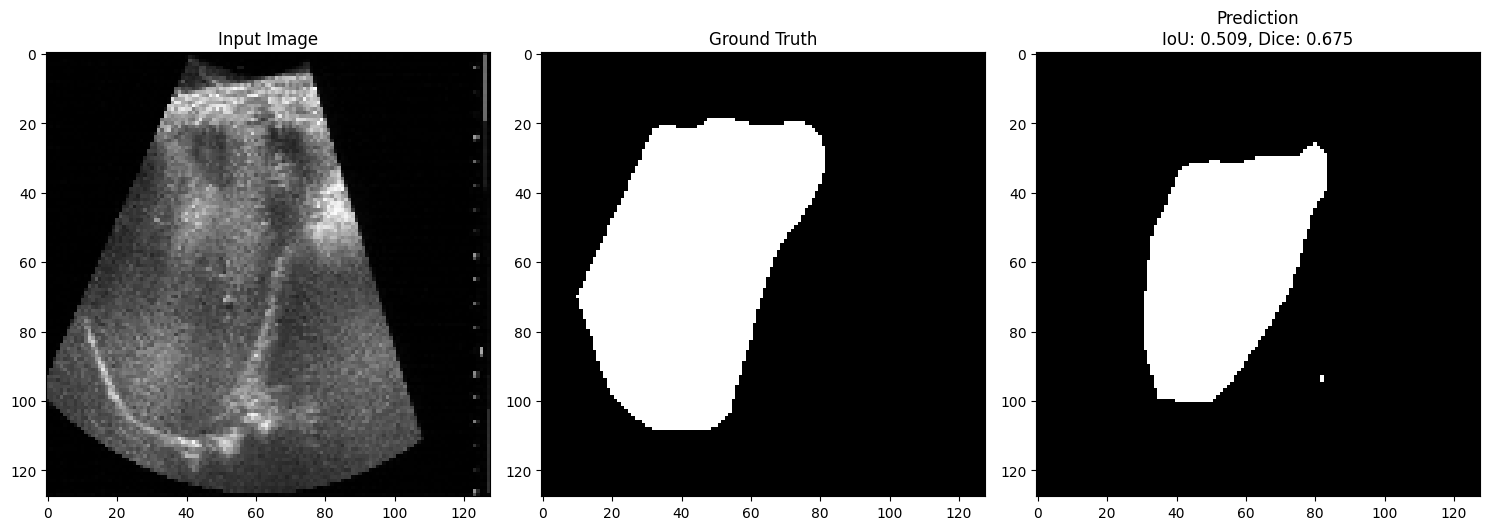

Processing image 112/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 113/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 114/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Processing image 115/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 116/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


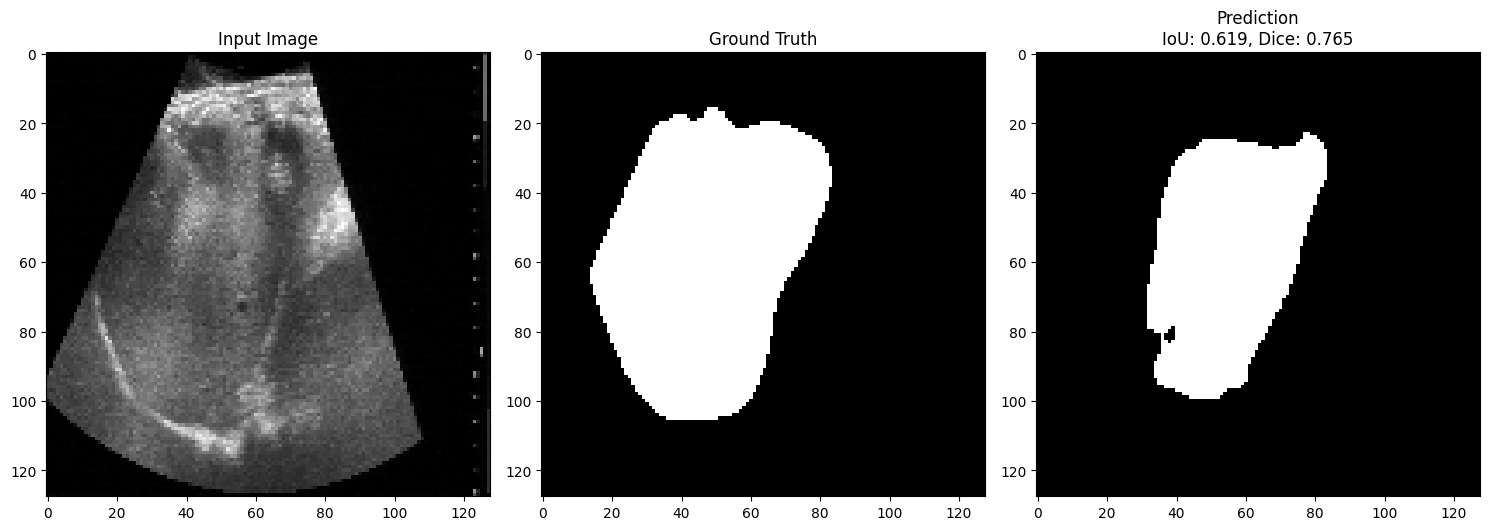

Processing image 117/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 118/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 119/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Processing image 120/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 121/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


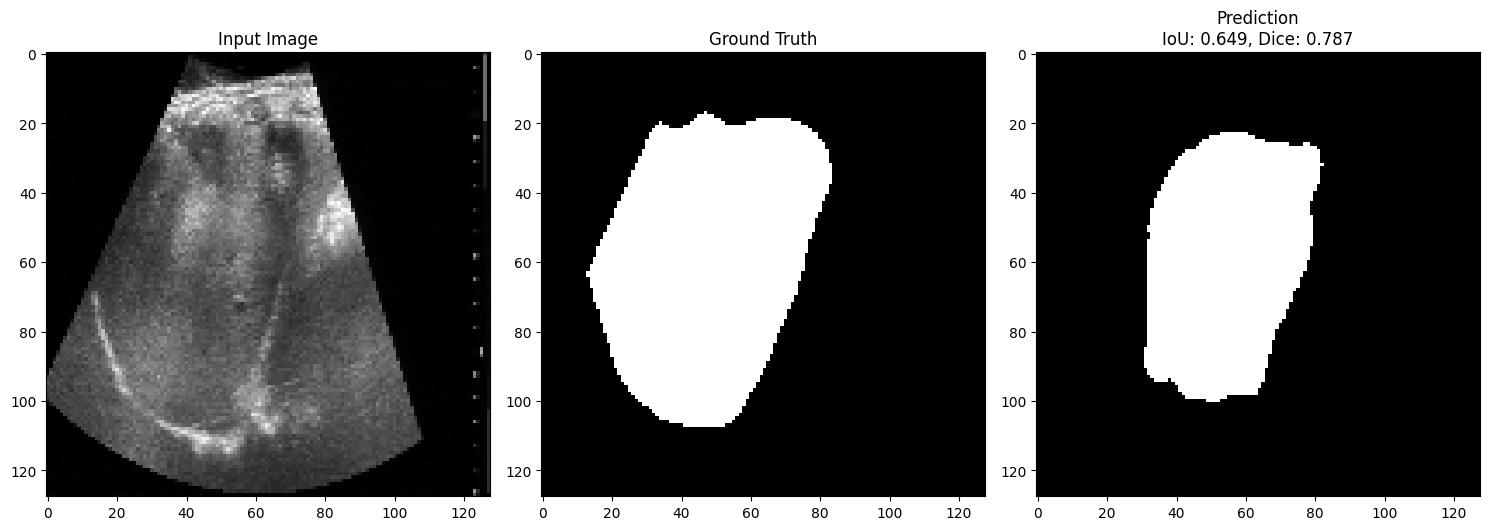

Processing image 122/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 123/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 124/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Processing image 125/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 126/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


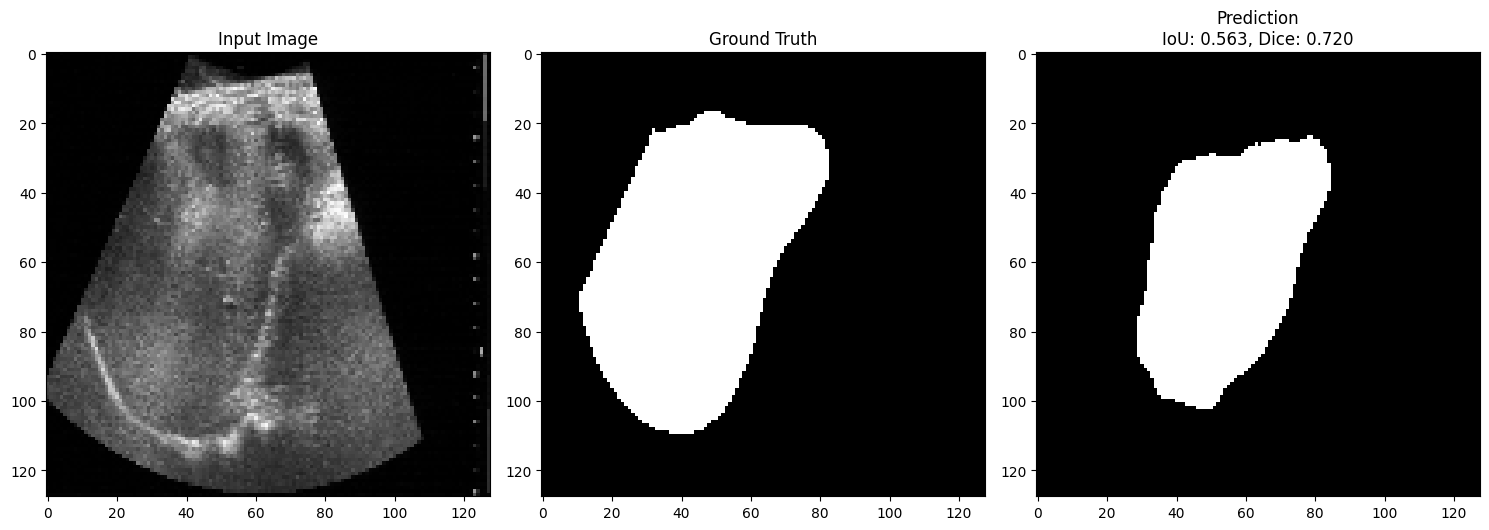

Processing image 127/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 128/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Results:
Mean IoU: 0.5833 ± 0.0457
Mean Dice: 0.7357 ± 0.0366


In [34]:
import os
import numpy as np
import cv2
from sklearn.metrics import jaccard_score, f1_score
import matplotlib.pyplot as plt

class TestDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(128,128)):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        # Load and preprocess image
        img_path = self.image_paths[index]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1)

        # Load and preprocess mask
        mask_path = self.mask_paths[index]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        return np.expand_dims(img, axis=0), np.expand_dims(mask, axis=0)

def compute_metrics_with_visualization(model, data_gen, save_path=None):
    iou_scores = []
    dice_scores = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)
        pred_binary = (pred > 0.5).astype(np.uint8)
        mask_binary = (mask > 0.5).astype(np.uint8)

        # Calculate metrics
        iou = jaccard_score(mask_binary.flatten(), pred_binary.flatten())
        dice = f1_score(mask_binary.flatten(), pred_binary.flatten())

        iou_scores.append(iou)
        dice_scores.append(dice)

        # Visualize every 5th image
        if i % 5 == 0:
            plt.figure(figsize=(15, 5))
            plt.subplot(131)
            plt.imshow(image[0,:,:,0], cmap='gray')
            plt.title('Input Image')
            plt.subplot(132)
            plt.imshow(mask[0,:,:,0], cmap='gray')
            plt.title('Ground Truth')
            plt.subplot(133)
            plt.imshow(pred_binary[0,:,:,0], cmap='gray')
            plt.title(f'Prediction\nIoU: {iou:.3f}, Dice: {dice:.3f}')
            plt.tight_layout()
            plt.show()

    mean_iou = np.mean(iou_scores)
    mean_dice = np.mean(dice_scores)
    std_iou = np.std(iou_scores)
    std_dice = np.std(dice_scores)

    return {
        'mean_iou': mean_iou,
        'mean_dice': mean_dice,
        'std_iou': std_iou,
        'std_dice': std_dice,
        'all_ious': iou_scores,
        'all_dices': dice_scores
    }

# Usage
TEST_IMAGE_PATH = "/content/dataset/V2/Images"
TEST_MASK_PATH = "/content/dataset/V2/AnnotationsWB"

test_data_gen = TestDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)
metrics = compute_metrics_with_visualization(model, test_data_gen, save_path='test_predictions')

print(f"Test Results:")
print(f"Mean IoU: {metrics['mean_iou']:.4f} ± {metrics['std_iou']:.4f}")
print(f"Mean Dice: {metrics['mean_dice']:.4f} ± {metrics['std_dice']:.4f}")